<a href="https://colab.research.google.com/github/kaioalexandre/pcb_defect_detection/blob/main/classifica_o__de___pcb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: importar todas as bibliotecas necessárias

In [ ]:
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

import os
import random 
import shutil

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
#!ls "/content/drive/Shareddrives/[iLabeling 4.0] Base de Conhecimento/Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Etapa 2: importar seu conjunto de dados

In [ ]:
!git clone https://github.com/utk-ink/Defect-Detection-of-PCB

fatal: destination path 'Defect-Detection-of-PCB' already exists and is not an empty directory.


In [ ]:
!cd /content/Defect-Detection-of-PCB/

# Etapa 3: dividir os dados

In [ ]:
def make_dirs(path, categories):
#Cria um diretório com subpastas que representam os rótulos 

  if (os.path.exists(path) and (os.listdir(path) != [])):
    print(f"Removing directory: {path}")
    shutil.rmtree(path)

  for cat in categories:
    output_dir = os.path.join(path, cat)
    os.makedirs(output_dir)
    print(f"Directory created: {output_dir}")

  return None

In [ ]:
def create_train_test_split(df, output_dir):

  train_dst = os.path.join(output_dir, 'train')
  test_dst = os.path.join(output_dir, 'test')

  for i in df.index:
    if df['folder'][i] == 'train':
      if df['label'][i] == 'good':
        shutil.copy(df['path'][i], # src dir
                    os.path.join(train_dst, 'good') # dst dir
                    )
      else:
        shutil.copy(df['path'][i], # src dir
                    os.path.join(train_dst, 'bad') # dst dir
                    )
    else:
      if df['label'][i] == 'good':
        shutil.copy(df['path'][i], # src dir 
                    os.path.join(test_dst, 'good') # dst dir
                    )
      else:
        shutil.copy(df['path'][i], # src dir 
                    os.path.join(test_dst, 'bad') # dst dir
                    )
  print("Conjunto de treino e teste foram criados.")
  return None

In [ ]:
train_dir = '/content/dataset/train' # diretório do conjunto de treino
test_dir  ='/content/dataset/test'   # diretório do conjunto de teste

make_dirs(train_dir, ['good', 'bad']) # cria pastas "good" e "bad" no diretório de treino
make_dirs(test_dir, ['good', 'bad'])  # cria pastas "good" e "bad" no diretório de teste

Removing directory: /content/dataset/train
Directory created: /content/dataset/train/good
Directory created: /content/dataset/train/bad
Removing directory: /content/dataset/test
Directory created: /content/dataset/test/good
Directory created: /content/dataset/test/bad


In [ ]:
def get_filenames_dataframe(path): 
#Fornece o caminho das imagens do dataset em um dataframe 

  paths = []  

  for dirname, _, filenames in os.walk(path):
    for filename in filenames:
      paths.append(os.path.join(dirname, filename))

  return pd.DataFrame(data = paths, columns = ['path'])

In [ ]:
import pandas as pd
# Cria dataframe com os caminhos das imagens do dataset
df = get_filenames_dataframe('/content/Defect-Detection-of-PCB/dataset/')

# rotular as imagens
df['label'] = df['path'].apply(lambda x: 'bad' if 'bad' in x else 'good')

# Atribui a partição para cada imagem
df['folder'] = df['path'].apply(lambda x: 'train' if 'train' in x else 'test')

df.head()

,path,label,folder
0,/content/Defect-Detection-of-PCB/dataset/train...,bad,train
1,/content/Defect-Detection-of-PCB/dataset/train...,bad,train
2,/content/Defect-Detection-of-PCB/dataset/train...,bad,train
3,/content/Defect-Detection-of-PCB/dataset/train...,good,train
4,/content/Defect-Detection-of-PCB/dataset/train...,bad,train


In [ ]:
create_train_test_split(df, '/content/dataset') # Copia as imagens para os diretórios de destino criados acima. 

Conjunto de treino e teste foram criados.


In [ ]:
!sudo apt-get install tree # visualizar os diretórios criados

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.8.0-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!tree '/content/dataset'

/content/dataset
├── test
│   ├── bad
│   │   ├── bad (103)k.jpeg
│   │   ├── bad (106)k.jpeg
│   │   ├── bad (109)k.jpeg
│   │   ├── bad (112)k.jpeg
│   │   ├── bad (116)k.jpeg
│   │   ├── bad (123)k.jpeg
│   │   ├── bad (126)k.jpeg
│   │   ├── bad (137)k.jpeg
│   │   ├── bad (140)k.jpeg
│   │   ├── bad (174)k.jpeg
│   │   ├── bad (228)k.jpeg
│   │   ├── bad (234)k.jpeg
│   │   ├── bad (235)k.jpeg
│   │   ├── bad (245)k.jpeg
│   │   ├── bad (24)k.jpeg
│   │   ├── bad (255)k.jpeg
│   │   ├── bad (25)k.jpeg
│   │   ├── bad (28)k.jpeg
│   │   ├── bad (297)k.jpeg
│   │   ├── bad (31)k.jpeg
│   │   ├── bad (378)k.jpeg
│   │   ├── bad (381)k.jpeg
│   │   ├── bad (403)k.jpeg
│   │   ├── bad (409)k.jpeg
│   │   ├── bad (413)k.jpeg
│   │   ├── bad (421)k.jpeg
│   │   ├── bad (431)k.jpeg
│   │   ├── bad (432)k.jpeg
│   │   ├── bad (439)k.jpeg
│   │   ├── bad (440)k.jpeg
│   │   ├── bad (451)k.jpeg
│   │   ├── bad (460)k.jpeg
│   │   ├── bad (461)k.jpeg
│   │   ├── bad (463)k.jpeg
│   │   ├── ba

In [ ]:
def get_filenames_dataframe(path): 
#Fornece o caminho completo das imagens do dataset em um dataframe 

  paths = []  

  for dirname, _, filenames in os.walk(path):
    for filename in filenames:
      paths.append(os.path.join(dirname, filename))

  return pd.DataFrame(data = paths, columns = ['path'])

In [ ]:
# Cria dataframe com os caminhos completos das imagens do dataset
df = get_filenames_dataframe('/content/Defect-Detection-of-PCB/dataset/')

# Atribui os rótulos para cada caminho de imagem.
df['label'] = df['path'].apply(lambda x: 'bad' if 'bad' in x else 'good')

# Atribui a partição (de treino ou teste) para cada caminho de imagem.
df['folder'] = df['path'].apply(lambda x: 'train' if 'train' in x else 'test')

df.head() # Mostra as 5 primeiras linhas do dataframe

,path,label,folder
0,/content/Defect-Detection-of-PCB/dataset/train...,bad,train
1,/content/Defect-Detection-of-PCB/dataset/train...,bad,train
2,/content/Defect-Detection-of-PCB/dataset/train...,bad,train
3,/content/Defect-Detection-of-PCB/dataset/train...,good,train
4,/content/Defect-Detection-of-PCB/dataset/train...,bad,train


In [ ]:
# verificar a distribuição de imagens entre as pastas de treino e teste.
df.groupby(['folder', 'label']).count().reset_index() 

,folder,label,path
0,test,bad,45
1,test,good,55
2,train,bad,570
3,train,good,525


<Axes: title={'center': 'Verificação da distribuição de imagens entre conjunto de teste e treino'}, xlabel='folder', ylabel='path'>

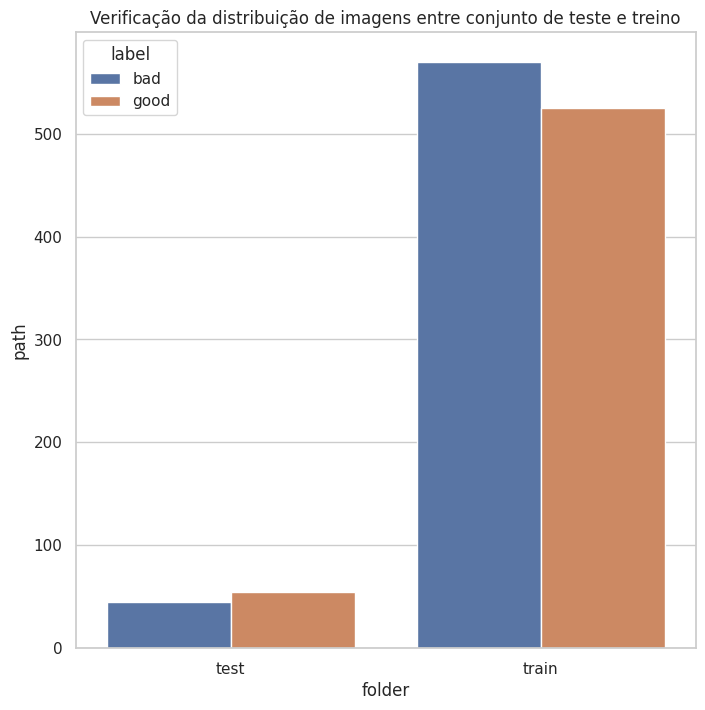

In [ ]:
# Visualização distribuição entre as classes (PCB "bad" e "good")

plt.figure(figsize = (8,8))
plt.title("Verificação da distribuição de imagens entre conjunto de teste e treino")
sns.set_theme(style="whitegrid")
sns.barplot(data = df.groupby(['folder', 'label']).count().reset_index(), x = 'folder', y = 'path', hue = 'label')

In [ ]:
def display_imgs(n_cols, n_rows, data):
  """ Mostra imagens aleatórias pertencentes ao conjunto de treino """ 
  fig = plt.figure(figsize = (15, 15))
  plt.xticks([])
  plt.yticks([])
  plt.title("Amostras de PCBs por categoria", y = 1.05, fontsize = 14)
  plt.rcParams['axes.facecolor'] = 'white'

  axes = [] 

  for i in range(n_cols * n_rows):

    # Item aleatório do dataframe
    rand_row = df.sample()

    # Caminho da imagem aleatória.
    random_filename = rand_row.path.item()

    # Leitura da imagem
    img = plt.imread(random_filename)

    # Cria subplots e adiciona ao conjunto de imagens a serem mostradas
    axes.append(fig.add_subplot(n_rows, n_cols, i+1))

    # Adiciona título ao subplot
    axes[-1].set_title(f'{rand_row.label.item()}')

    # Retira grid das imagens
    axes[-1].axis('off')

    plt.subplots_adjust(hspace = 0.8)
    plt.imshow(img)


# Etapa 4: importe seu modelo pré-treinado

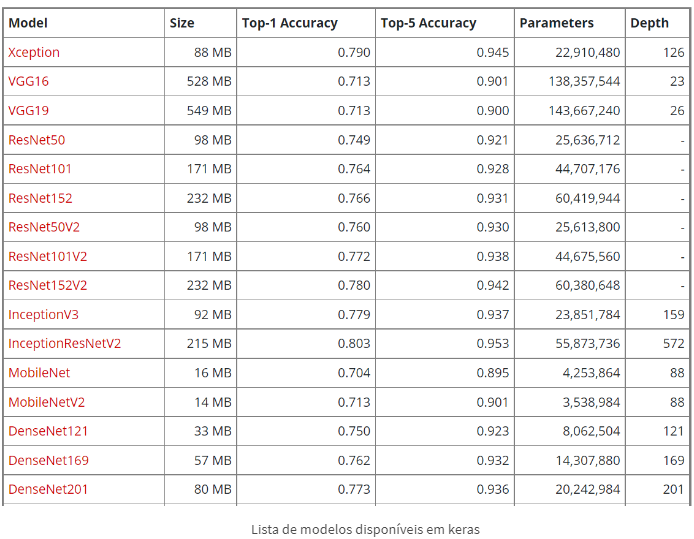

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input # Aprendizado por transferência com VGG19
#import tf.keras.applications.resnet50.preprocess_input

from tensorflow.keras.preprocessing import image # carregar uma imagem com keras.


# caminho do dataset de treino
input_dir_path = '/content/dataset/train'

# caminho do dataset de teste
test_dir_path = '/content/dataset/test'


# dimensões da imagem
target_size = (124,124)

# tamanho do lote (batch size)
batch_size = 32

# Preprocessamento das imagens
data_gen = ImageDataGenerator(validation_split = 0.1,
                              preprocessing_function = preprocess_input) 
test_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_data_gen = data_gen.flow_from_directory(input_dir_path,
                                              batch_size = batch_size,
                                              target_size = target_size,
                                              class_mode = 'binary',
                                              shuffle  = False,
                                              seed = 101,
                                              subset = 'training')

val_data_gen = data_gen.flow_from_directory(input_dir_path,
                                            target_size = target_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            seed = 101,
                                            shuffle = False,
                                            # color_mode = 'grayscale',
                                            subset = 'validation')
test_gen = test_data_gen.flow_from_directory(test_dir_path,
                                             target_size = target_size,
                                             batch_size = batch_size,
                                             class_mode = 'binary',
                                             shuffle = False,
                                             seed = 101
                                             )

nb_train_samples = train_data_gen.samples
nb_validation_samples = val_data_gen.samples

Found 986 images belonging to 2 classes.
Found 109 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
classes_labels = train_data_gen.class_indices
print(f"Classes Label: {classes_labels}")

Classes Label: {'bad': 0, 'good': 1}


In [ ]:
input_shape = (target_size[0], target_size[1], 3)

pre_trained_model = tf.keras.applications.ResNet50(input_shape = input_shape,
                             weights = 'imagenet',  
                             include_top = False)   
                             
pre_trained_model.trainable = True 


In [ ]:
resnet_model = Sequential()

pre_trained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5)
                   #weights='imagenet'
pre_trained_model.trainable = True 

'for layer in pretrained_model.layers:\n        layer.trainable= True\n\nresnet_model.add(pretrained_model)'

In [ ]:
# Criação da camada de classificação (camadas totalmente conectadas + camada de classificação).
#Foi removido as camadas de dropout, pois não convergia para o mínimo global.

tf_model = Sequential()

tf_model.add(pre_trained_model)

tf_model.add(Flatten())
tf_model.add(Dense(2048))
# tf_model.add(Dropout(0.1))
tf_model.add(Activation('relu'))

tf_model.add(Dense(1024))
tf_model.add(Activation('sigmoid'))
# tf_model.add(Dropout(0.1))

tf_model.add(Dense(512))
tf_model.add(Activation('relu'))
tf_model.add(Dropout(0.1))

tf_model.add(Dense(128))
tf_model.add(Activation('tanh'))
tf_model.add(Dropout(0.1))

tf_model.add(Dense(32))
tf_model.add(Activation('relu'))
# tf_model.add(Dropout(0.1))

tf_model.add(Dense(16))
tf_model.add(Activation('relu'))
# tf_model.add(Dropout(0.1))

tf_model.add(Dense(4))
tf_model.add(Activation('relu'))
# tf_model.add(Dropout(0.1))

tf_model.add(Dense(1))
tf_model.add(Activation('sigmoid'))

tf_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 activation (Activation)     (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

model_dir = '/content/results/'

es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 30)
mc = ModelCheckpoint (os.path.join(model_dir, 'best_model.h5'),
                      monitor = 'val_accuracy',
                      model = 'max',
                      verbose = 1,
                      save_the_best_only = True)

# Modelo mais basico

In [ ]:
#construuindo uma rede neural mais leve
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (124, 124, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(1))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

model_dir = '/content/results/'

es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   verbose = 1,
                   patience = 30)
mc = ModelCheckpoint (os.path.join(model_dir, 'best_model.h5'),
                      monitor = 'val_accuracy',
                      model = 'max',
                      verbose = 1,
                      save_the_best_only = True)

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

epochs = 10

history = model.fit_generator(train_data_gen,
                              steps_per_epoch = train_data_gen.samples/train_data_gen.batch_size,
                              epochs = epochs,
                              validation_data = val_data_gen,
                              validation_steps = val_data_gen.samples/val_data_gen.batch_size,
                              callbacks =[es, mc])

<ipython-input-85-efeb86905901>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen,


Epoch 1/10
31/30 [==============================] - ETA: 0s - loss: 7.3840 - accuracy: 0.5213
Epoch 1: saving model to /content/results/best_model.h5
30/30 [==============================] - 35s 1s/step - loss: 7.3840 - accuracy: 0.5213 - val_loss: 7.3587 - val_accuracy: 0.5229
Epoch 2/10
31/30 [==============================] - ETA: 0s - loss: 7.3840 - accuracy: 0.5213
Epoch 2: saving model to /content/results/best_model.h5
30/30 [==============================] - 34s 1s/step - loss: 7.3840 - accuracy: 0.5213 - val_loss: 7.3587 - val_accuracy: 0.5229
Epoch 3/10
31/30 [==============================] - ETA: 0s - loss: 7.3840 - accuracy: 0.5213
Epoch 3: saving model to /content/results/best_model.h5
30/30 [==============================] - 32s 1s/step - loss: 7.3840 - accuracy: 0.5213 - val_loss: 7.3587 - val_accuracy: 0.5229
Epoch 4/10
31/30 [==============================] - ETA: 0s - loss: 7.3840 - accuracy: 0.5213
Epoch 4: saving model to /content/results/best_model.h5
30/30 [======

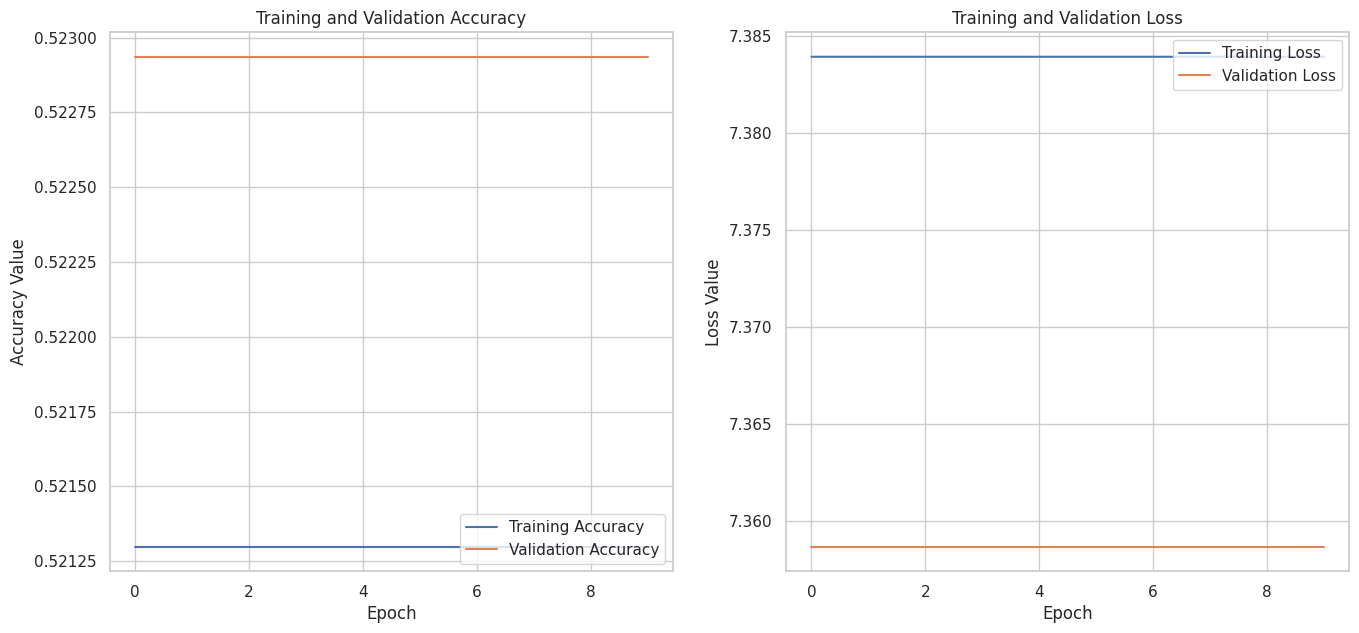

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

# Etapa 5: Treinar o modelo para classificação de PCB

In [ ]:
tf_model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

epochs = 10

history1 = tf_model.fit_generator(train_data_gen,
                              steps_per_epoch = train_data_gen.samples/train_data_gen.batch_size,
                              epochs = epochs,
                              validation_data = val_data_gen,
                              validation_steps = val_data_gen.samples/val_data_gen.batch_size,
                              callbacks =[es, mc])

<ipython-input-87-7f5ce0aa5461>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = tf_model.fit_generator(train_data_gen,


Epoch 1/10
31/30 [==============================] - ETA: -1s - loss: 0.9048 - accuracy: 0.4797
Epoch 1: saving model to /content/results/best_model.h5
30/30 [==============================] - 347s 10s/step - loss: 0.9048 - accuracy: 0.4797 - val_loss: 0.6934 - val_accuracy: 0.4771
Epoch 2/10
31/30 [==============================] - ETA: -1s - loss: 0.6936 - accuracy: 0.4807
Epoch 2: saving model to /content/results/best_model.h5
30/30 [==============================] - 306s 10s/step - loss: 0.6936 - accuracy: 0.4807 - val_loss: 0.6933 - val_accuracy: 0.4771
Epoch 3/10
31/30 [==============================] - ETA: -1s - loss: 0.6938 - accuracy: 0.4422
Epoch 3: saving model to /content/results/best_model.h5
30/30 [==============================] - 307s 10s/step - loss: 0.6938 - accuracy: 0.4422 - val_loss: 0.6931 - val_accuracy: 0.5229
Epoch 4/10
31/30 [==============================] - ETA: -1s - loss: 0.6933 - accuracy: 0.4361
Epoch 4: saving model to /content/results/best_model.h5
30/

In [ ]:
from tensorflow.keras.models import load_model
tf_model.save_weights("modelov2_rn50.h5")
tf_model.save('/content/drive/notebooks/modelov2_rn50.h5')


# Etapa 6: avaliação do modelo

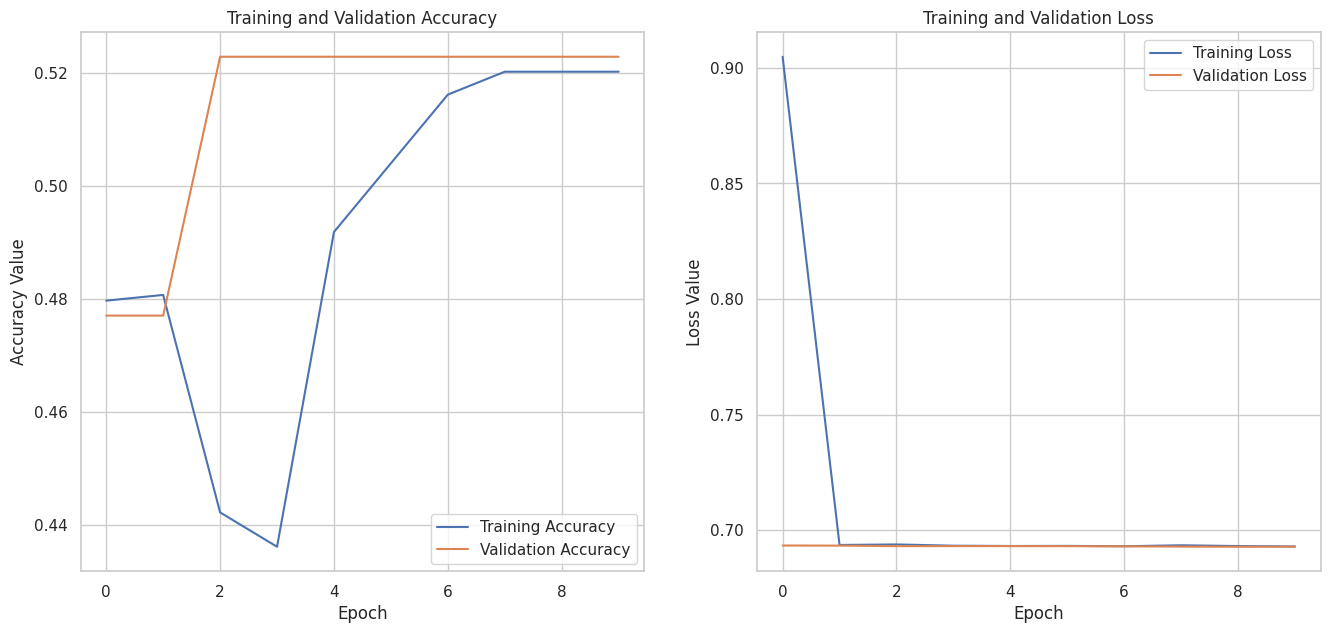

In [ ]:

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

Y_pred = tf_model.predict(val_data_gen) # Retorna a probabilidade de classificação para cada imagem pertencente ao conjunto de validação.
y_pred = np.where(Y_pred < 0.7, 0, 1).ravel() # Caso a probabilidade seja > 0.7 (70%), retorna 1 ('good'). Caso seja menor, retorna 0 ('bad')

print('Confusion Matrix \n')
print(confusion_matrix(val_data_gen.classes, y_pred))
print('\n')
print('Classification Report \n')
target_names = ['bad', 'good']
print(classification_report(val_data_gen.classes, y_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
from matplotlib import cm
from sklearn import metrics
from sklearn.metrics import roc_curve

In [ ]:
def classify_batch_of_imgs(data, model, target_names):

  Y_pred = model.predict(data)
  y_pred = np.where(Y_pred < 0.5, 0, 1).ravel()

  print('Classification Report \n')
  print(classification_report(data.classes, y_pred, target_names=target_names))
  return y_pred

In [ ]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Matriz de Confusão', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    Normalization can be applied by setting `normalize=True`
    """
    fig = plt.figure(figsize = (7,7), dpi = 100)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.colorbar()    
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
    
#     plt.tight_layout()
    plt.ylabel("Classes Verdadeiras")
    plt.xlabel("Classes Inferidas")

In [ ]:
model = keras.models.load_model("/content/drive/Shareddrives/[iLabeling 4.0] Base de Conhecimento/Notebooks/Modelos/kaio/modelo_rn50.h5")

In [ ]:
y_test = test_gen.classes

In [ ]:
  # Plot da curva de acurácia e loss para treinamento e validação

# Etapa: treinamento com modelo com TRAINABLE = TRUE

Y_pred = tf_model.predict(val_data_gen) # Retorna a probabilidade de classificação para cada imagem pertencente ao conjunto de validação.
y_pred = np.where(Y_pred < 0.5, 0, 1).ravel() # Caso a probabilidade seja > 0.5 (50%), retorna 1 ('good'). Caso seja menor, retorna 0 ('bad')

print('Confusion Matrix \n')
print(confusion_matrix(val_data_gen.classes, y_pred))
print('\n')
print('Classification Report \n')
target_names = ['bad', 'good']
print(classification_report(val_data_gen.classes, y_pred, target_names=target_names))

# Etapa 7: carregar e testar o modelo

In [ ]:
def classify_an_img(img_path, model):

  img = image.load_img(img_path, target_size = (256, 256)) # Carrega uma imagem de entrada nas dimensões que foram utilizadas no modelo.

  # Modelos de deep learning geralmente esperam um lote de imagens para realizar a predição. Neste caso, batch de apenas uma imagem.
  img_array = image.img_to_array(img) 
  img_batch = np.expand_dims(img_array, axis = 0) 

  # Normaliza a imagem de entrada conforme o padrão utilizado na arquitetura VGG19.
  img_prepr = preprocess_input(img_batch)

  prediction = model.predict(img_prepr)

  return 'good' if prediction > 0.7 else 'bad'


In [ ]:
def display_an_img(img_path, prediction, label):
    """ Mostra imagens aleatórias pertencentes ao conjunto de treino """ 
    img = plt.imread(img_path)
    fig = plt.figure(figsize = (9, 9))
    plt.axis('off')
    # plt.xticks([])
    # plt.yticks([])
    plt.title(f"Resultado da predição: {prediction}\nRótulo real: {label}", y = 1.05, fontsize = 14)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.imshow(img)



In [ ]:
def get_random_test_img(df):

    # Item aleatório do dataframe
    rand_row = df[df['folder'] == 'test'].sample()

    # Caminho da imagem aleatória.
    return rand_row.path.item(), rand_row.label.item()


In [ ]:
def get_inference_time():
  pass

In [ ]:
model = keras.models.load_model("/content/drive/Shareddrives/[iLabeling 4.0] Base de Conhecimento/Notebooks/Modelos/kaio/modelo_rn50.h5")


1/1 [==============================] - 0s 343ms/step


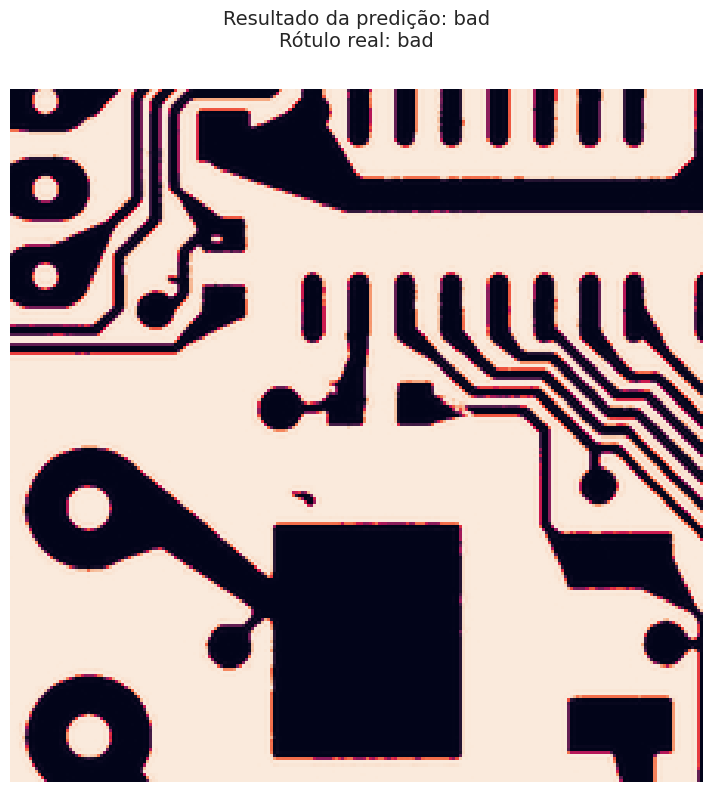

In [ ]:
rand_test_img, label = get_random_test_img(df)
prediction = classify_an_img(rand_test_img, model)
display_an_img(rand_test_img, prediction, label)